# Feature Engineering for PowerCo Churn Analysis

In [1]:
# Starter Notebook Code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [17]:
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
# Set seaborn style for plots
sns.set(color_codes=True, style="whitegrid")

In [19]:
# Import Data
cleaned_data_path = 'clean_data_after_eda.csv'
df = pd.read_csv(cleaned_data_path)

In [20]:
# Display the first few rows to understand the data
def preview_data(data):
    print("Data Overview:")
    display(data.head())
    print("\nData Info:")
    display(data.info())

In [21]:
preview_data(df)

Data Overview:


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_

None

In [22]:
# Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
var_year_price_off_peak_var       0
var_year_price_peak_var           0
var_year_pr

In [23]:
# Fill missing values with appropriate strategies (e.g., filling with zeros for simplicity)
df.fillna(0, inplace=True)

In [24]:
# Remove Irrelevant or Redundant Columns
# Identify columns with only one unique value
irrelevant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("\nColumns with a single unique value:", irrelevant_columns)


Columns with a single unique value: []


In [25]:
# Drop irrelevant columns
df.drop(columns=irrelevant_columns, inplace=True)

In [26]:
# Expand Existing Columns
# Extract useful features from date columns
df['activation_month'] = pd.to_datetime(df['date_activ']).dt.month
df['activation_year'] = pd.to_datetime(df['date_activ']).dt.year
df['renewal_month'] = pd.to_datetime(df['date_renewal']).dt.month

In [27]:
# Combine Columns to Create Better Features
# Create new combined features
df['price_diff_dec_jan'] = df['forecast_price_energy_off_peak'] * (1 + df['var_year_price_off_peak_var'])
df['net_margin_per_cons'] = df['net_margin'] / (df['cons_12m'] + 1e-5)  # Avoid division by zero
df['off_peak_to_peak_ratio'] = df['forecast_price_energy_off_peak'] / (df['forecast_price_energy_peak'] + 1e-5)

In [28]:
# Verify New Features
# Display the newly created features
print("\nNewly Created Features:")
print(df[['price_diff_dec_jan', 'activation_month', 'net_margin_per_cons', 'off_peak_to_peak_ratio']].head())


Newly Created Features:
   price_diff_dec_jan  activation_month  net_margin_per_cons  \
0            0.114488                 6         6.789900e+07   
1            0.145712                 8         4.053648e-03   
2            0.165795                 4         1.213235e-02   
3            0.146695                 3         1.607323e-02   
4            0.116902                 1         1.084294e-02   

   off_peak_to_peak_ratio  
0                1.166364  
1            14571.100000  
2                1.885973  
3            14669.400000  
4                1.168708  


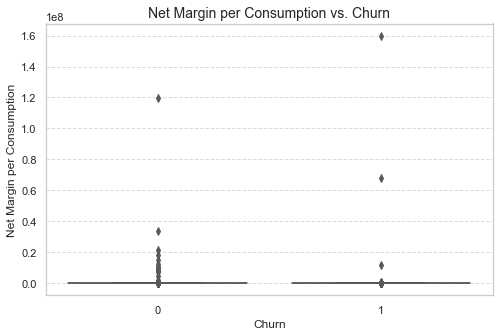

In [29]:
# Visualize relationships
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='net_margin_per_cons', data=df, palette='Set2')
plt.title('Net Margin per Consumption vs. Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Net Margin per Consumption', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

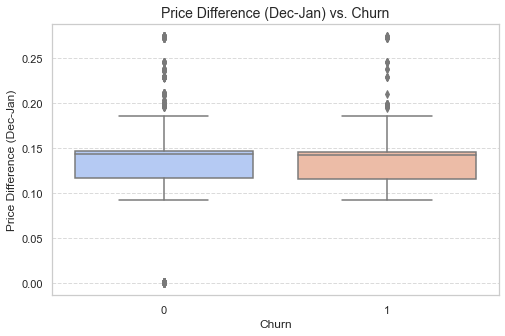

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='price_diff_dec_jan', data=df, palette='coolwarm')
plt.title('Price Difference (Dec-Jan) vs. Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Price Difference (Dec-Jan)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [31]:
# Step 7: Save the Updated Dataset
# Save the cleaned and feature-engineered dataset
df.to_csv('cleaned_feature_engineered_data.csv', index=False)
print("\nFeature-engineered dataset saved as 'cleaned_feature_engineered_data.csv'.")


Feature-engineered dataset saved as 'cleaned_feature_engineered_data.csv'.
